#### Aryan Pandey 
#### 19BEC0553

#### Loading Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#### Loading the dataset 
#### Replacing np.inf and -np.inf with nan and droping them 

In [2]:
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### Importing various metrics for evaluation of the modles

In [4]:
from sklearn.metrics import confusion_matrix,accuracy_score, r2_score,f1_score, mean_squared_error as mse
confusion_matrix_models = []
accuracy_score_models = []
f1_score_models = []
r2_score_models = []
rmse_models = []
mse_models = []

#### Dividing the data set into x,y and applying StandardScaler preprocessing 
#### Spliting the dataset into Train and test sets

In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
y[0:5], x[0:5]

(array([1, 1, 1, 1, 1], dtype=int64),
 array([[7.5000000e+01, 0.0000000e+00, 5.8200000e+02, 0.0000000e+00,
         2.0000000e+01, 1.0000000e+00, 2.6500000e+05, 1.9000000e+00,
         1.3000000e+02, 1.0000000e+00, 0.0000000e+00, 4.0000000e+00],
        [5.5000000e+01, 0.0000000e+00, 7.8610000e+03, 0.0000000e+00,
         3.8000000e+01, 0.0000000e+00, 2.6335803e+05, 1.1000000e+00,
         1.3600000e+02, 1.0000000e+00, 0.0000000e+00, 6.0000000e+00],
        [6.5000000e+01, 0.0000000e+00, 1.4600000e+02, 0.0000000e+00,
         2.0000000e+01, 0.0000000e+00, 1.6200000e+05, 1.3000000e+00,
         1.2900000e+02, 1.0000000e+00, 1.0000000e+00, 7.0000000e+00],
        [5.0000000e+01, 1.0000000e+00, 1.1100000e+02, 0.0000000e+00,
         2.0000000e+01, 0.0000000e+00, 2.1000000e+05, 1.9000000e+00,
         1.3700000e+02, 1.0000000e+00, 0.0000000e+00, 7.0000000e+00],
        [6.5000000e+01, 1.0000000e+00, 1.6000000e+02, 1.0000000e+00,
         2.0000000e+01, 0.0000000e+00, 3.2700000e+05, 2.70000

In [6]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, random_state=0, test_size=3/10)

#### GaussianNB 

In [7]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [8]:
confusion_matrix_models.append(confusion_matrix(y_test, y_pred))

accuracy_score_models.append(accuracy_score(y_test, y_pred))

f1_score_models.append(f1_score(y_test, y_pred, average='weighted'))

r2_score_models.append(r2_score(y_pred, y_test))

mse_models.append(mse(y_pred, y_test))

rmse_models.append(np.sqrt(mse(y_pred, y_test)))

#### DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

drugTree.fit(x_train, y_train)

predTree = drugTree.predict(x_test)

predTree[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [10]:
confusion_matrix_models.append(confusion_matrix(y_test, predTree))

accuracy_score_models.append(accuracy_score(y_test,predTree))

f1_score_models.append(f1_score(y_test, predTree, average='weighted'))

r2_score_models.append(r2_score(predTree, y_test))

mse_models.append(mse(predTree, y_test))

rmse_models.append(np.sqrt(mse(predTree, y_test)))

#### Logistic regression 

In [11]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
y_pred = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)
yhat_prob[0:5], y_pred[0:5]

(array([[0.97047585, 0.02952415],
        [0.91526772, 0.08473228],
        [0.18386612, 0.81613388],
        [0.95865365, 0.04134635],
        [0.92328255, 0.07671745]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [12]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.4621688082862221

In [13]:
confusion_matrix_models.append(confusion_matrix(y_test, y_pred))

accuracy_score_models.append(accuracy_score(y_test, y_pred))

f1_score_models.append(f1_score(y_test, y_pred, average='weighted'))

r2_score_models.append(r2_score(y_pred, y_test))

mse_models.append(mse(y_pred, y_test))

rmse_models.append(np.sqrt(mse(y_pred, y_test)))

#### KNeighborsClassifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, y_pred)
    std_acc[n-1] = np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.55555556, 0.61111111, 0.54444444, 0.62222222, 0.56666667,
       0.58888889, 0.58888889, 0.62222222, 0.58888889, 0.64444444,
       0.63333333, 0.63333333, 0.6       , 0.61111111, 0.6       ,
       0.63333333, 0.64444444, 0.65555556, 0.61111111])

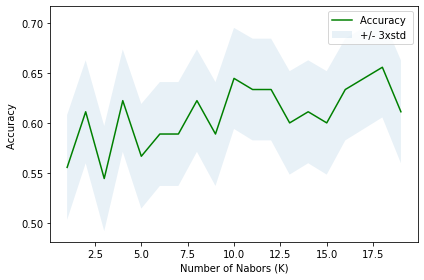

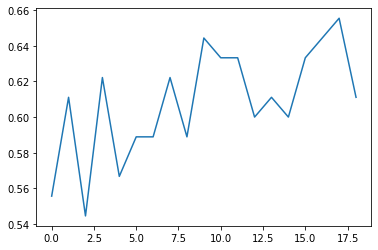

The best accuracy was with 0.6555555555555556 with k= 18


In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
plt.plot(mean_acc)
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [16]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(x_train, y_train)
y_pred = neigh.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [17]:
confusion_matrix_models.append(confusion_matrix(y_test, y_pred))

accuracy_score_models.append(accuracy_score(y_test, y_pred))

f1_score_models.append(f1_score(y_test, y_pred, average='weighted'))

r2_score_models.append(r2_score(y_pred, y_test))

mse_models.append(mse(y_pred, y_test))

rmse_models.append(np.sqrt(mse(y_pred, y_test)))

#### SVM

In [18]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

y_pred = clf.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [19]:
confusion_matrix_models.append(confusion_matrix(y_test, y_pred))

accuracy_score_models.append(accuracy_score(y_test,y_pred))

f1_score_models.append(f1_score(y_test, y_pred, average='weighted'))

r2_score_models.append(r2_score(y_pred, y_test))

mse_models.append(mse(y_pred, y_test))

rmse_models.append(np.sqrt(mse(y_pred, y_test)))

#### Tabular format

In [20]:
name = ['GaussianNB', 'DecisionTreeClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'svm']

data = {'Name': name,
        'accuracy_score_models' : accuracy_score_models,
        'f1_score_models' : f1_score_models,
        'r2_score_models': r2_score_models,
        'mse' : mse_models,
        'rmse_models': rmse_models,
        'confusion_matrix_models' : confusion_matrix_models,}

report = pd.DataFrame(data)
report

,Name,accuracy_score_models,f1_score_models,r2_score_models,mse,rmse_models,confusion_matrix_models
0,GaussianNB,0.777778,0.757279,-0.520270,0.222222,0.471405,"[[58, 4], [16, 12]]"
1,DecisionTreeClassifier,0.877778,0.874155,0.357560,0.122222,0.349603,"[[59, 3], [8, 20]]"
2,LogisticRegression,0.833333,0.825881,0.068323,0.166667,0.408248,"[[58, 4], [11, 17]]"
3,KNeighborsClassifier,0.655556,0.562468,-5.564706,0.344444,0.586894,"[[58, 4], [27, 1]]"
4,svm,0.688889,0.561988,0.000000,0.311111,0.557773,"[[62, 0], [28, 0]]"


#### Ploting the Varoius graphs for metrics and models 

Text(0.5, 1.0, 'Report_Accuracy_Score')

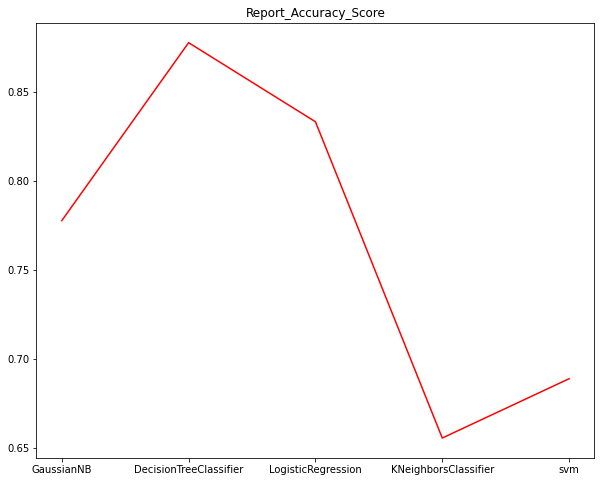

In [21]:
figure( figsize=(10, 8))

plt.plot(name, accuracy_score_models, color='red')

plt.title('Report_Accuracy_Score')

Text(0.5, 1.0, 'Report_f1_score_models')

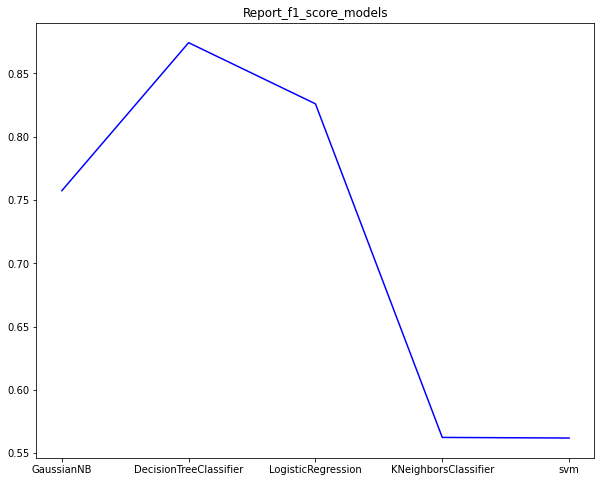

In [22]:
figure( figsize=(10, 8))

plt.plot(name, f1_score_models, color='blue')

plt.title('Report_f1_score_models')

Text(0.5, 1.0, 'Report_r2_score_models')

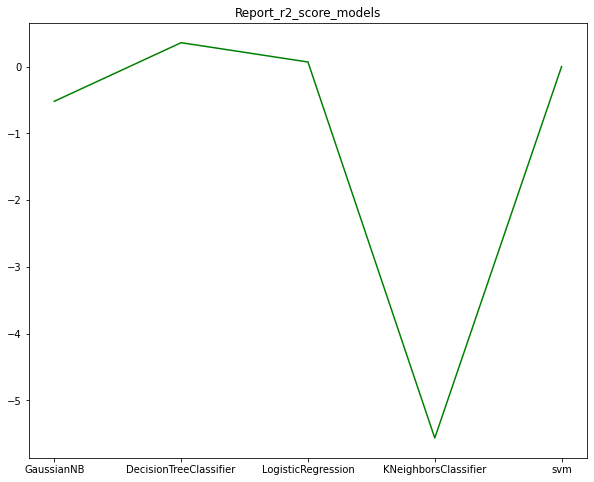

In [23]:
figure( figsize=(10, 8))

plt.plot(name, r2_score_models, color='green')

plt.title('Report_r2_score_models')

Text(0.5, 1.0, 'Report_mse_models')

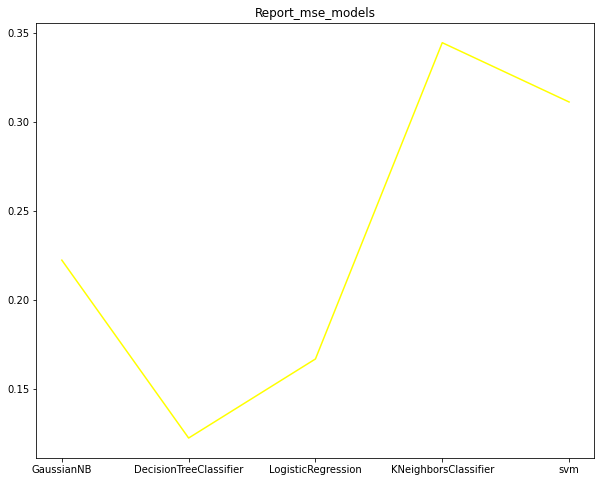

In [24]:
figure( figsize=(10, 8))

plt.plot(name, mse_models, color='yellow')

plt.title('Report_mse_models')

Text(0.5, 1.0, 'Report_rmse_models')

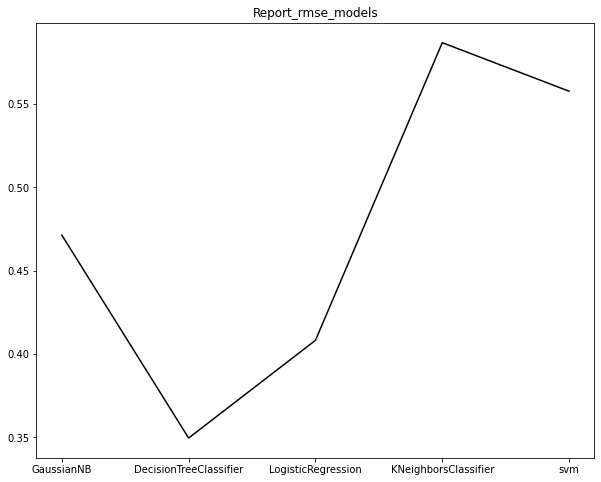

In [25]:
figure( figsize=(10, 8))

plt.plot(name, rmse_models, color='black')

plt.title('Report_rmse_models')